# Face Mask Detection

For this project, we will be working on the Face Mask detection problem.

The Dataset contains images of people wearing masks and people not wearing masks. The database contains 10,000 colored images in the training folder, 800 images in the validation folder, and 992 images in the test folder.

## Your task is to create a CNN model for identifying whether a person in the image is wearing a mask or not.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir= r"D:\Python_coding\Internshala_projects\Final_Assignment_Face Mask Dataset\Train"
validation_dir= r"D:\Python_coding\Internshala_projects\Final_Assignment_Face Mask Dataset\Validation"
test_dir= r"D:\Python_coding\Internshala_projects\Final_Assignment_Face Mask Dataset\Test"

# Data Pre- Processing

 1. Read the picture files
 2. Decode the Jpeg content to RBG grids of pixel
 3. Convert these into floating point tensor.
 4. Rescale the pixel values (between 0 and 255 ) to the [0,1] interval.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of tensor image data 

In [7]:
train_datagenerator = train_datagen.flow_from_directory( train_dir, target_size= (150,150), batch_size= 20, class_mode='binary')

Found 10000 images belonging to 2 classes.


In [8]:
validation_datagenerator = test_datagen.flow_from_directory( validation_dir, target_size = (150,150), batch_size= 20, class_mode='binary')

Found 800 images belonging to 2 classes.


In [9]:
from keras.applications import VGG16
conv_base = VGG16(weights= 'imagenet',
                 include_top= False,
                 input_shape= (150,150,3))

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# Compiling the model

Here we use features like SGD, RMSprop 

In [14]:
from tensorflow.keras import optimizers

In [15]:
model.compile(loss="binary_crossentropy",
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\Akash Sahlot\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Mask_Detection_Project_Model-{epoch:02d}.h5",
                                                save_best_only= True)

In [17]:
history = model.fit_generator(train_datagenerator,
                             steps_per_epoch=100,
                             epochs=5,
                             validation_data= validation_datagenerator,
                             callbacks=[checkpoint_cb])


Epoch 1/5


C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_11440\2362583574.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagenerator,


100/100 [==============================] - 350s 3s/step - loss: 0.6187 - acc: 0.6680 - val_loss: 0.0781 - val_acc: 0.9750
Epoch 2/5
100/100 [==============================] - 348s 3s/step - loss: 0.1601 - acc: 0.9425 - val_loss: 0.0348 - val_acc: 0.9887
Epoch 3/5
100/100 [==============================] - 420s 4s/step - loss: 0.1030 - acc: 0.9595 - val_loss: 0.0700 - val_acc: 0.9787
Epoch 4/5
100/100 [==============================] - 354s 4s/step - loss: 0.0862 - acc: 0.9720 - val_loss: 0.0188 - val_acc: 0.9962
Epoch 5/5
100/100 [==============================] - 368s 4s/step - loss: 0.2092 - acc: 0.9710 - val_loss: 0.0151 - val_acc: 0.9962


# Plotting Graph

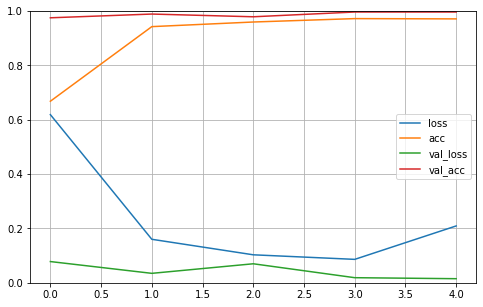

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history.csv'

In [20]:
with open (hist_csv_file, mode= 'w') as f:
    hist_df.to_csv(f)

In [21]:
test_generator= test_datagen.flow_from_directory(test_dir, 
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

Found 992 images belonging to 2 classes.


In [22]:
model.evaluate_generator(test_generator, steps=50)

C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_11440\421928545.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=50)


[0.0138474740087986, 0.9919354915618896]